 # DL Assignment 6

-------------------------------------------------------------------------------

### Topic: Implementing Recurrent Neural Networks And  LSTM (Long Short-Term Memory)

Name: Priyanka Nandkumar Gaikwad

Roll no: 23

PRN: 12210124

Google Stock Prediction : https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
# Load dataset
df = pd.read_csv('/content/GOOG.csv')

##EDA

Data shape: (1258, 14)

Missing values:
 symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

Data types:
 symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object


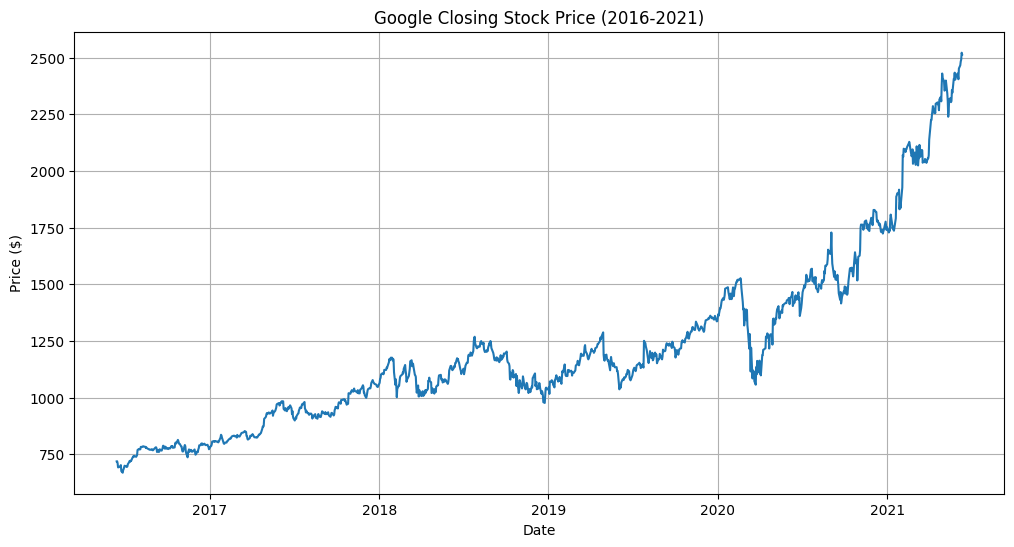

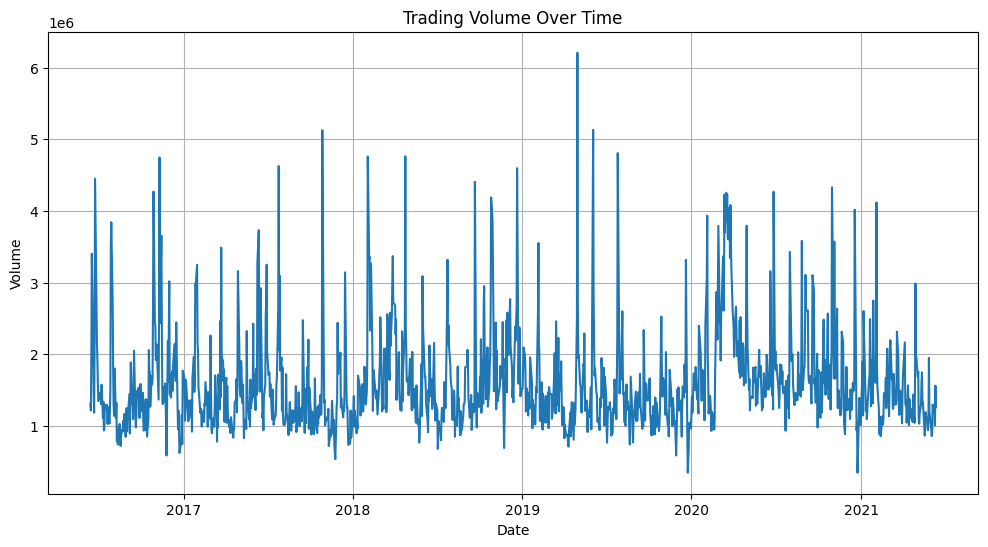

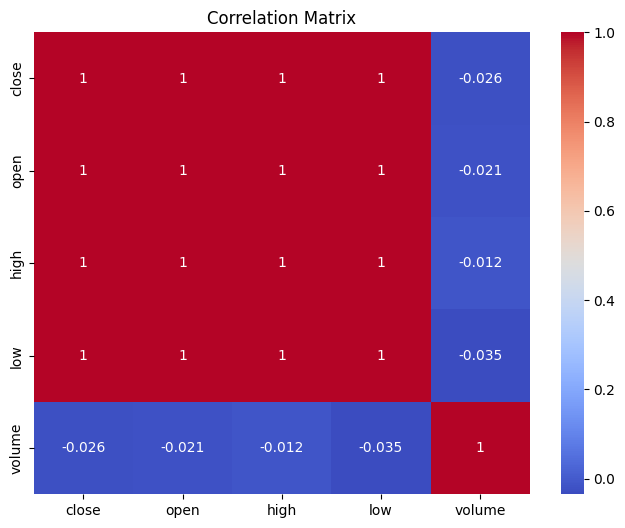

In [ ]:
# Basic EDA
print("Data shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Convert date to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['close'])
plt.title('Google Closing Stock Price (2016-2021)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

# Plot volume
plt.figure(figsize=(12, 6))
plt.plot(df['volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid()
plt.show()

# Correlation matrix
corr_matrix = df[['close', 'open', 'high', 'low', 'volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Preprocessing

In [ ]:
# Use only the 'close' price for this prediction task
data = df[['close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for time series prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Set sequence length (using 60 days as lookback window)
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets (80-20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for RNN/LSTM input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

##RNN

In [ ]:
# Build RNN model
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(50),
    Dropout(0.2),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train RNN
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.2059 - val_loss: 0.0161
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0305 - val_loss: 0.0057
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0155 - val_loss: 0.0033
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092 - val_loss: 0.0024
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - val_loss: 0.0022
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - val_loss: 0.0014
Epoch 9/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 10/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 11/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 12/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.

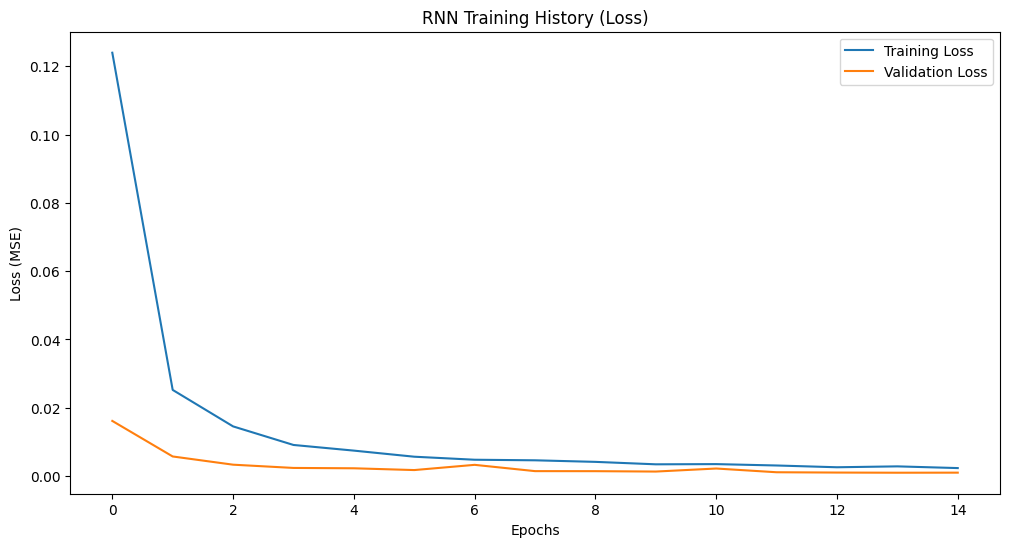

In [ ]:
# For RNN model
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training History (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()



##LSTM

In [ ]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0171 - val_loss: 0.0022
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7103e-04 - val_loss: 0.0022
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.3781e-04 - val_loss: 0.0021
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.8353e-04 - val_loss: 0.0022
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5229e-04 - val_loss: 0.0021
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.0225e-04 - val_loss: 0.0021
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0269e-04 - val_loss: 0.0018
Epoch 9/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0111e-04 - val_loss: 0.0019
Epoch 10/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.3162e-04 - val_loss: 0.0018
Epoch 11/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.4363e-04 - val_loss: 0.0019
Epoch 12/15
27/27 ━━━━━━━━━

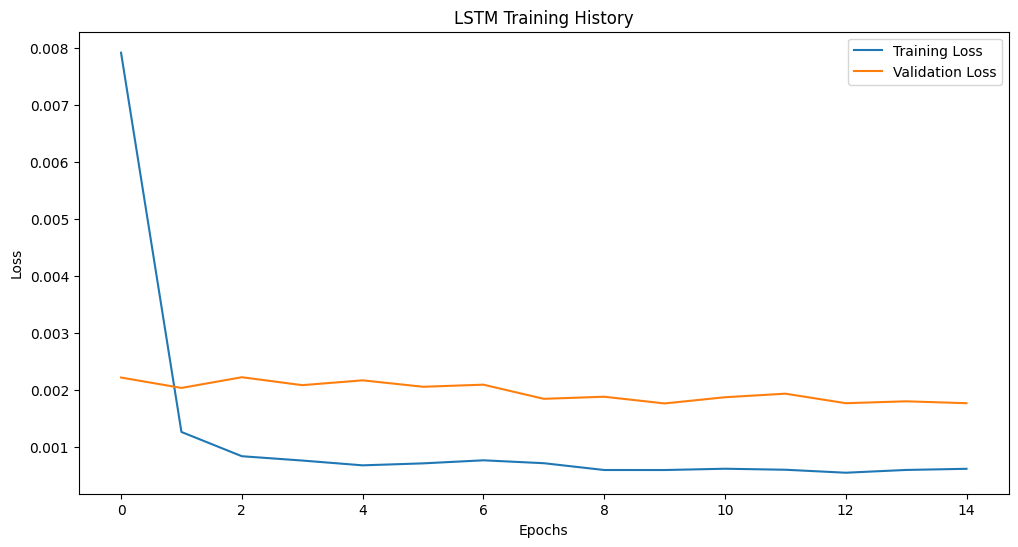

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation and Analysis

RNN Evaluation:
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


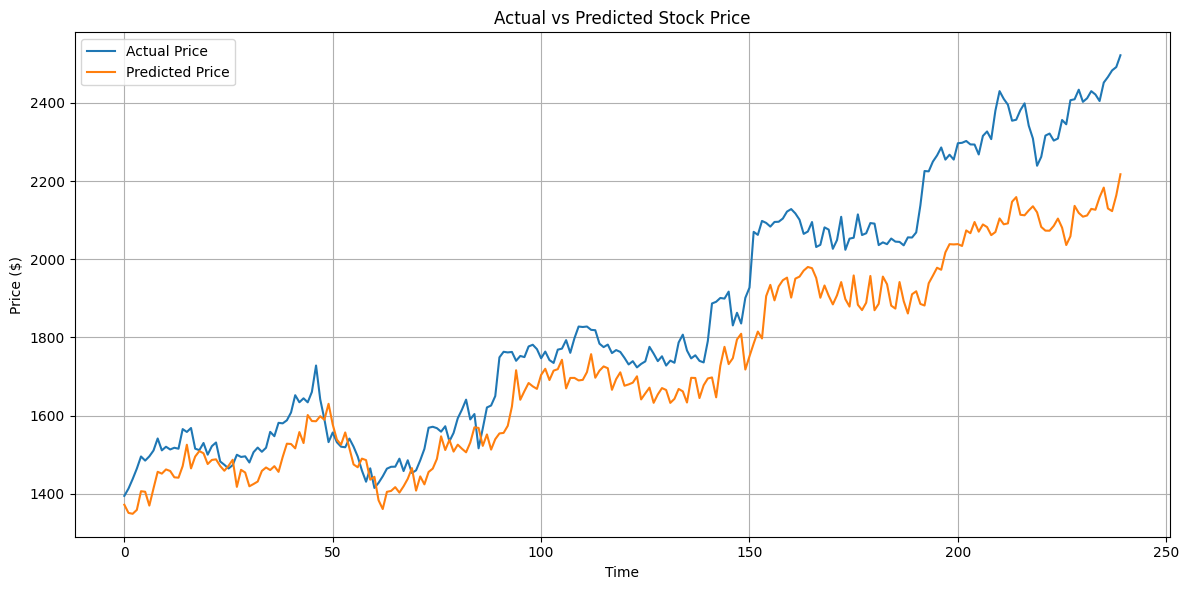

MSE: 24416.38, RMSE: 156.26, MAE: 128.29, R²: 0.7577

LSTM Evaluation:
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


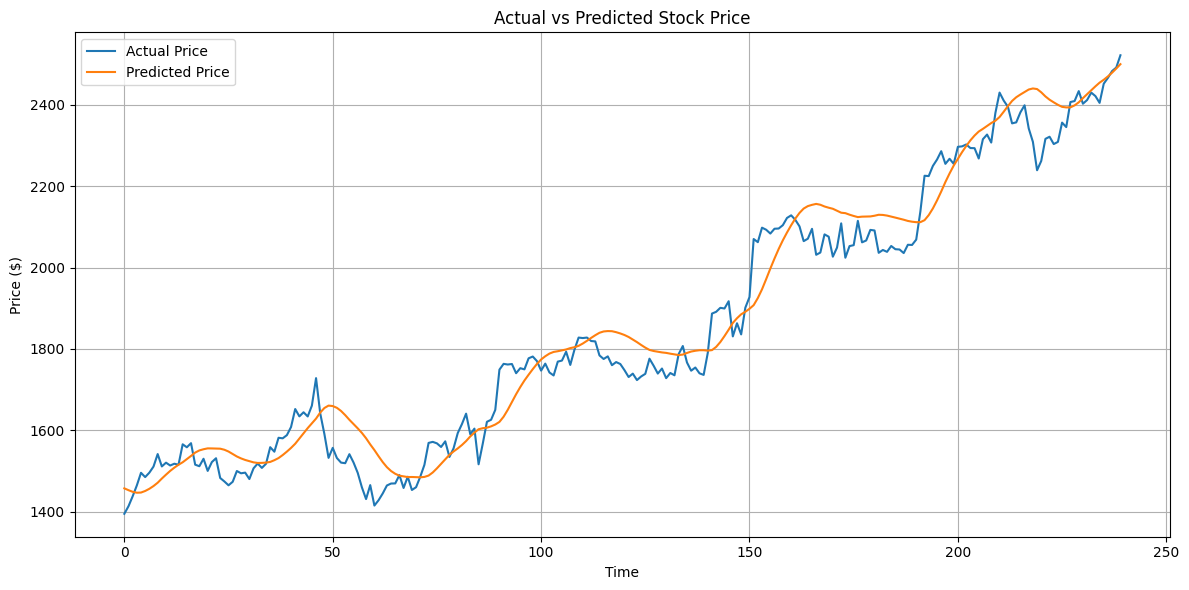

MSE: 4309.49, RMSE: 65.65, MAE: 53.33, R²: 0.9572


In [ ]:

# Function to evaluate models
def evaluate_model(model, X_test, y_test, scaler):
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate metrics
    mse = mean_squared_error(y_test_actual, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_actual, predictions)
    r2 = r2_score(y_test_actual, predictions)

    # Plot predictions vs actual
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_actual, label='Actual Price')
    plt.plot(predictions, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return mse, rmse, mae, r2, predictions, y_test_actual

# Evaluate RNN
print("RNN Evaluation:")
rnn_mse, rnn_rmse, rnn_mae, rnn_r2, rnn_predictions, y_test_actual_rnn = evaluate_model(rnn_model, X_test, y_test, scaler)
print(f"MSE: {rnn_mse:.2f}, RMSE: {rnn_rmse:.2f}, MAE: {rnn_mae:.2f}, R²: {rnn_r2:.4f}")

# Evaluate LSTM
print("\nLSTM Evaluation:")
lstm_mse, lstm_rmse, lstm_mae, lstm_r2, lstm_predictions, y_test_actual_lstm = evaluate_model(lstm_model, X_test, y_test, scaler)
print(f"MSE: {lstm_mse:.2f}, RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}, R²: {lstm_r2:.4f}")


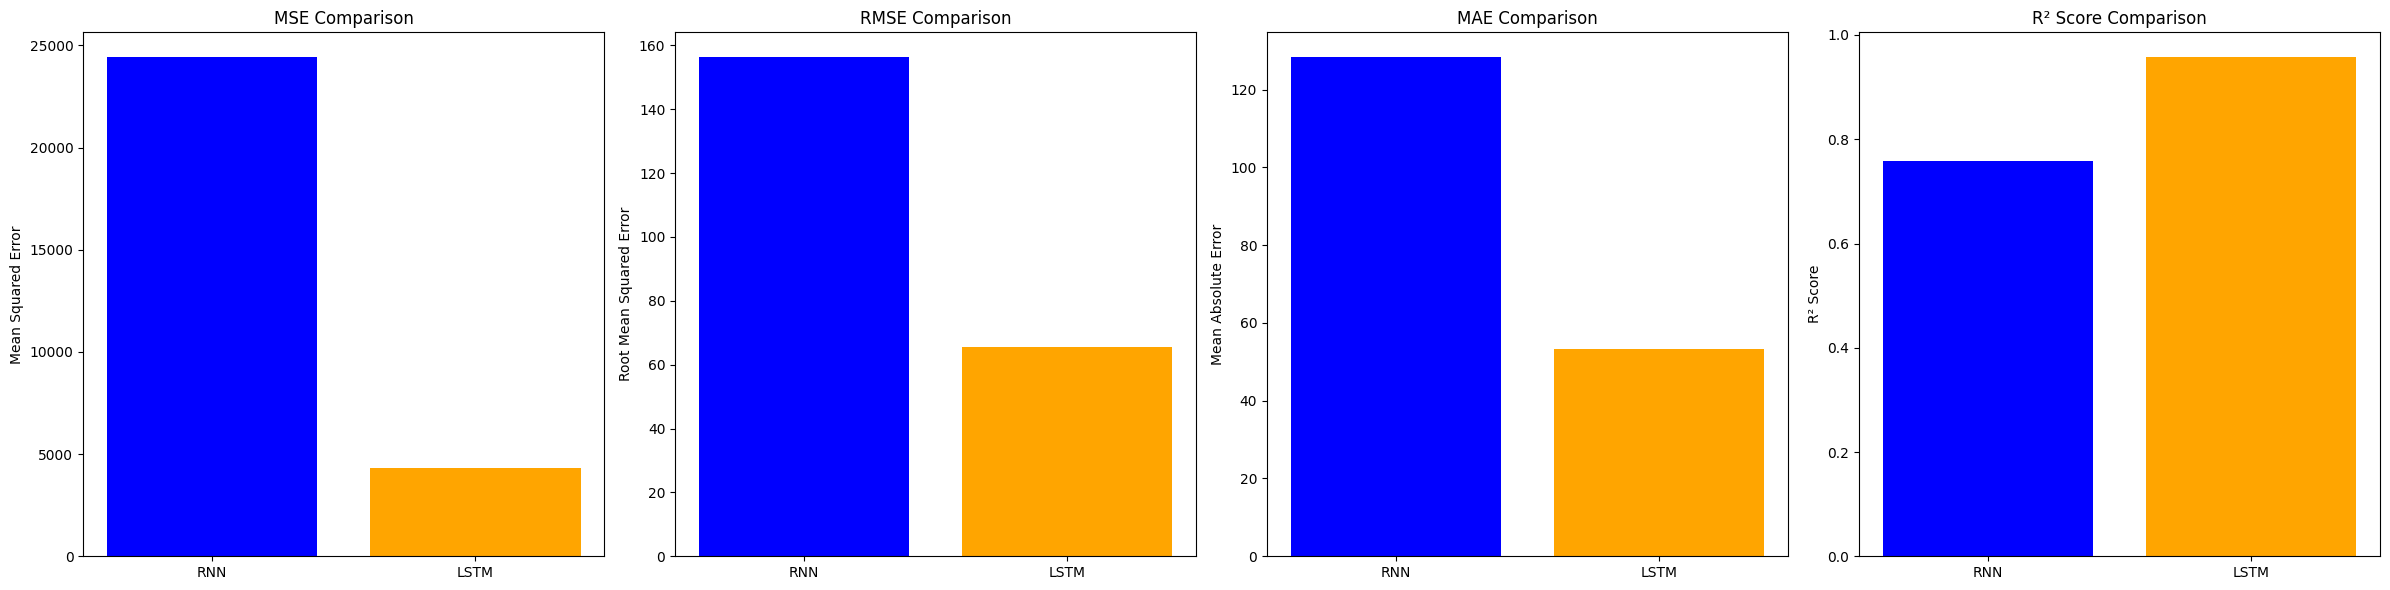

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

# MSE
ax1.bar(['RNN', 'LSTM'], [rnn_mse, lstm_mse], color=['blue', 'orange'])
ax1.set_title('MSE Comparison')
ax1.set_ylabel('Mean Squared Error')

# RMSE
ax2.bar(['RNN', 'LSTM'], [rnn_rmse, lstm_rmse], color=['blue', 'orange'])
ax2.set_title('RMSE Comparison')
ax2.set_ylabel('Root Mean Squared Error')

# MAE
ax3.bar(['RNN', 'LSTM'], [rnn_mae, lstm_mae], color=['blue', 'orange'])
ax3.set_title('MAE Comparison')
ax3.set_ylabel('Mean Absolute Error')

# R²
ax4.bar(['RNN', 'LSTM'], [rnn_r2, lstm_r2], color=['blue', 'orange'])
ax4.set_title('R² Score Comparison')
ax4.set_ylabel('R² Score')

plt.tight_layout()
plt.show()

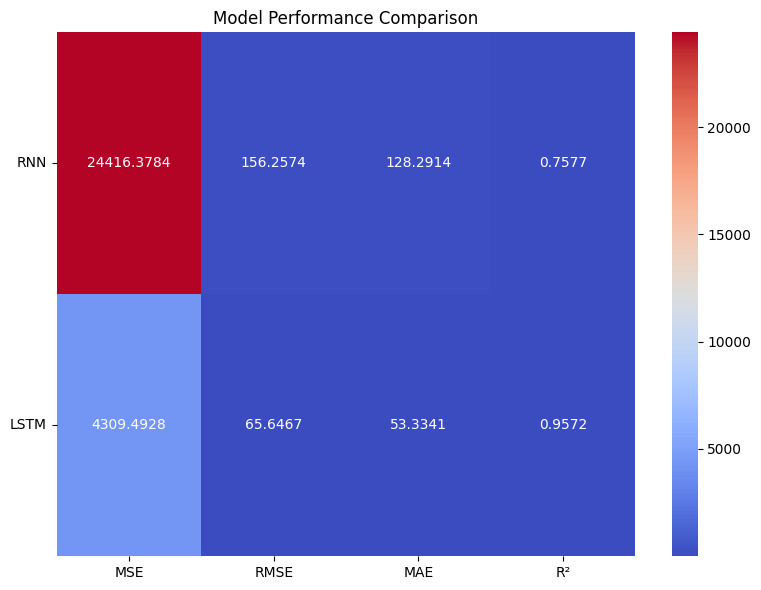

In [ ]:
# --- Heatmap for All Metrics ---
metrics_data = {
    'MSE': [rnn_mse, lstm_mse],
    'RMSE': [rnn_rmse, lstm_rmse],
    'MAE': [rnn_mae, lstm_mae],
    'R²': [rnn_r2, lstm_r2]
}

metrics_df = pd.DataFrame(metrics_data, index=['RNN', 'LSTM'])

plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="coolwarm", cbar=True)
plt.title('Model Performance Comparison')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


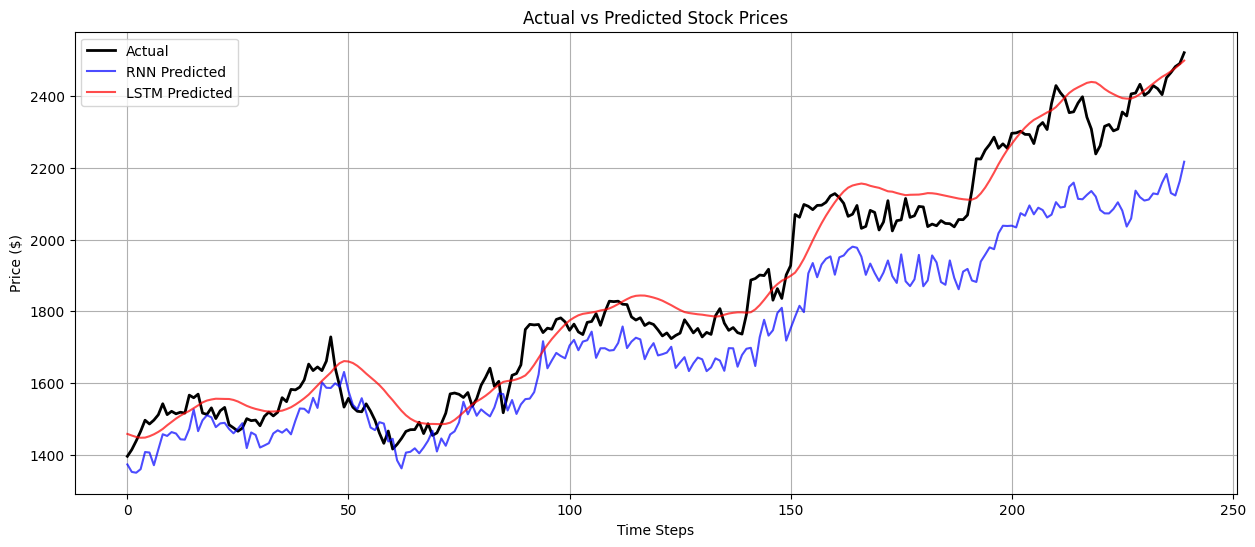

In [ ]:
plt.figure(figsize=(15, 6))

# Get predictions
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

# Inverse transform
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
rnn_pred = scaler.inverse_transform(rnn_pred)
lstm_pred = scaler.inverse_transform(lstm_pred)

# Plot
plt.plot(y_test_actual, label='Actual', color='black', linewidth=2)
plt.plot(rnn_pred, label='RNN Predicted', color='blue', alpha=0.7)
plt.plot(lstm_pred, label='LSTM Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.ylabel('Price ($)')
plt.xlabel('Time Steps')
plt.legend()
plt.grid(True)
plt.show()

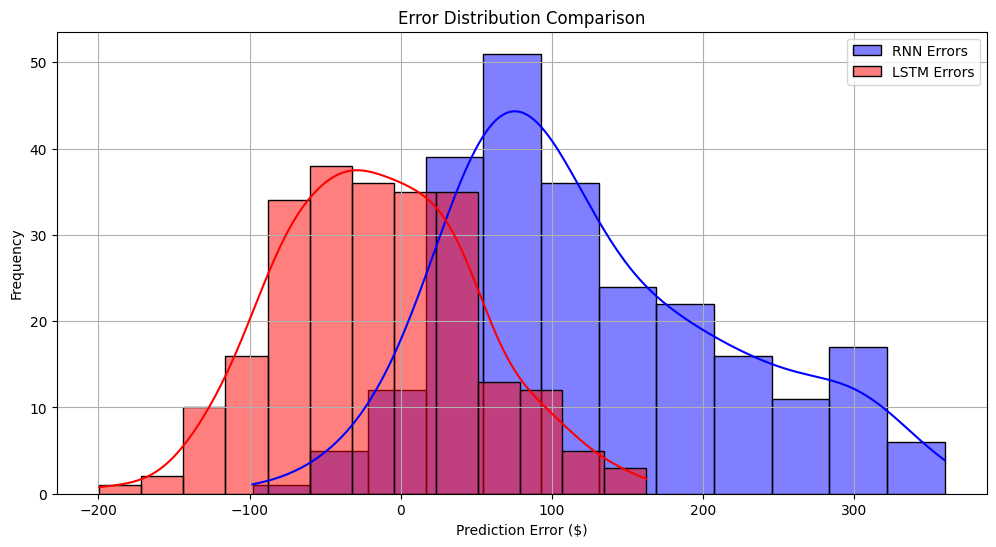

In [ ]:
plt.figure(figsize=(12, 6))

# Calculate errors
rnn_errors = y_test_actual.flatten() - rnn_pred.flatten()
lstm_errors = y_test_actual.flatten() - lstm_pred.flatten()

# Plot
sns.histplot(rnn_errors, color='blue', kde=True, label='RNN Errors', alpha=0.5)
sns.histplot(lstm_errors, color='red', kde=True, label='LSTM Errors', alpha=0.5)
plt.title('Error Distribution Comparison')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

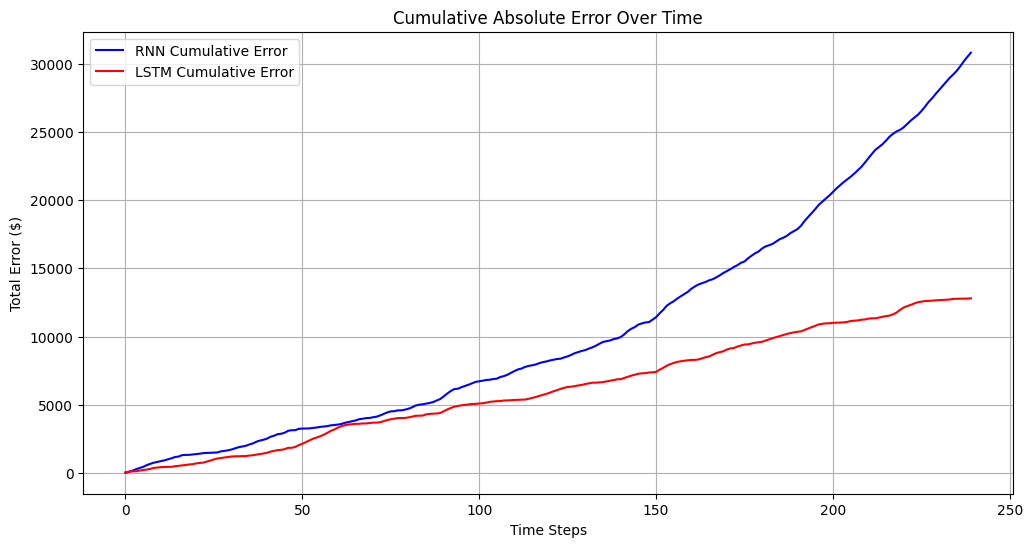

In [ ]:
plt.figure(figsize=(12, 6))

# Calculate cumulative errors
plt.plot(np.cumsum(np.abs(rnn_errors)), label='RNN Cumulative Error', color='blue')
plt.plot(np.cumsum(np.abs(lstm_errors)), label='LSTM Cumulative Error', color='red')
plt.title('Cumulative Absolute Error Over Time')
plt.ylabel('Total Error ($)')
plt.xlabel('Time Steps')
plt.legend()
plt.grid(True)
plt.show()

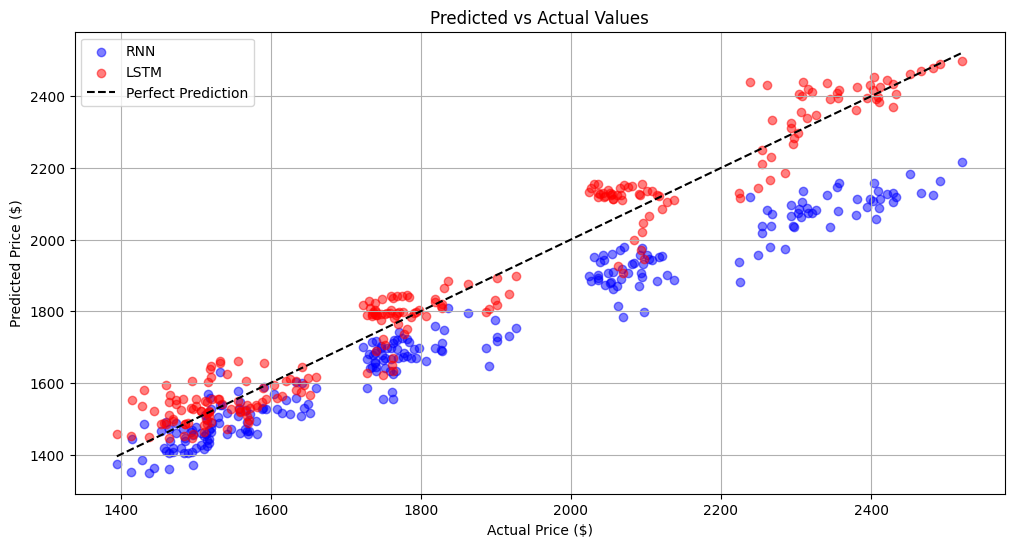

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test_actual, rnn_pred, color='blue', alpha=0.5, label='RNN')
plt.scatter(y_test_actual, lstm_pred, color='red', alpha=0.5, label='LSTM')
plt.plot([min(y_test_actual), max(y_test_actual)],
         [min(y_test_actual), max(y_test_actual)],
         'k--', label='Perfect Prediction')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True)
plt.show()

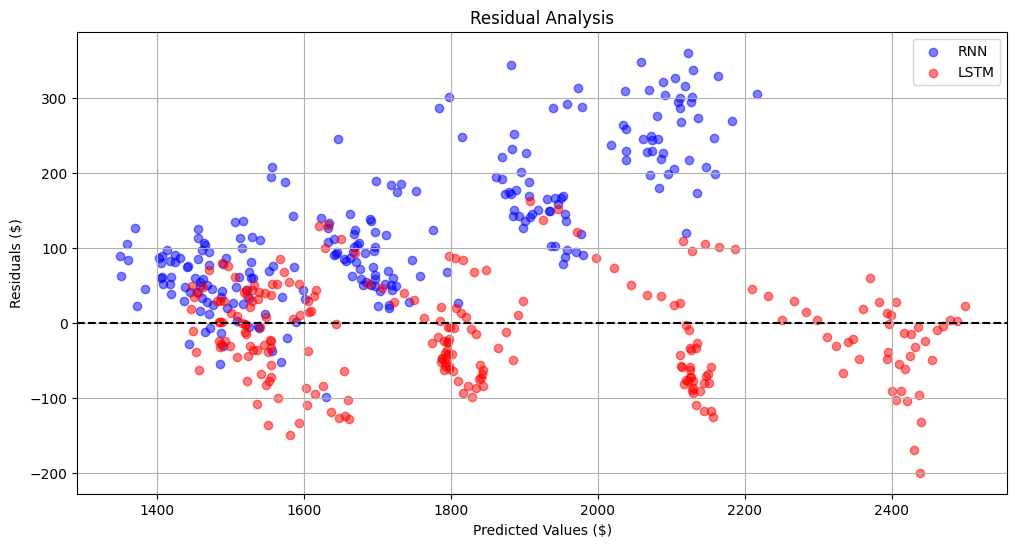

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(rnn_pred, rnn_errors, color='blue', alpha=0.5, label='RNN')
plt.scatter(lstm_pred, lstm_errors, color='red', alpha=0.5, label='LSTM')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values ($)')
plt.ylabel('Residuals ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get last 70 days (60 for sequence + 10 for prediction)
test_sequence = scaled_data[-70:]

# Create sequences
X_test_last = np.array([test_sequence[i-60:i, 0] for i in range(60, 70)])
X_test_last = np.reshape(X_test_last, (X_test_last.shape[0], X_test_last.shape[1], 1))

# Predict
predictions = scaler.inverse_transform(lstm_model.predict(X_test_last))
actual = scaler.inverse_transform(test_sequence[-10:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Last 10-Day Predictions vs Actual:
                     Date  Actual   Predicted
2021-05-28 00:00:00+00:00 2411.56 2425.845703
2021-06-01 00:00:00+00:00 2429.81 2435.354736
2021-06-02 00:00:00+00:00 2421.28 2445.251221
2021-06-03 00:00:00+00:00 2404.61 2454.277832
2021-06-04 00:00:00+00:00 2451.76 2461.372559
2021-06-07 00:00:00+00:00 2466.09 2469.670654
2021-06-08 00:00:00+00:00 2482.85 2478.824463
2021-06-09 00:00:00+00:00 2491.40 2488.993896
2021-06-10 00:00:00+00:00 2521.60 2499.718506
2021-06-11 00:00:00+00:00 2513.93 2511.979004


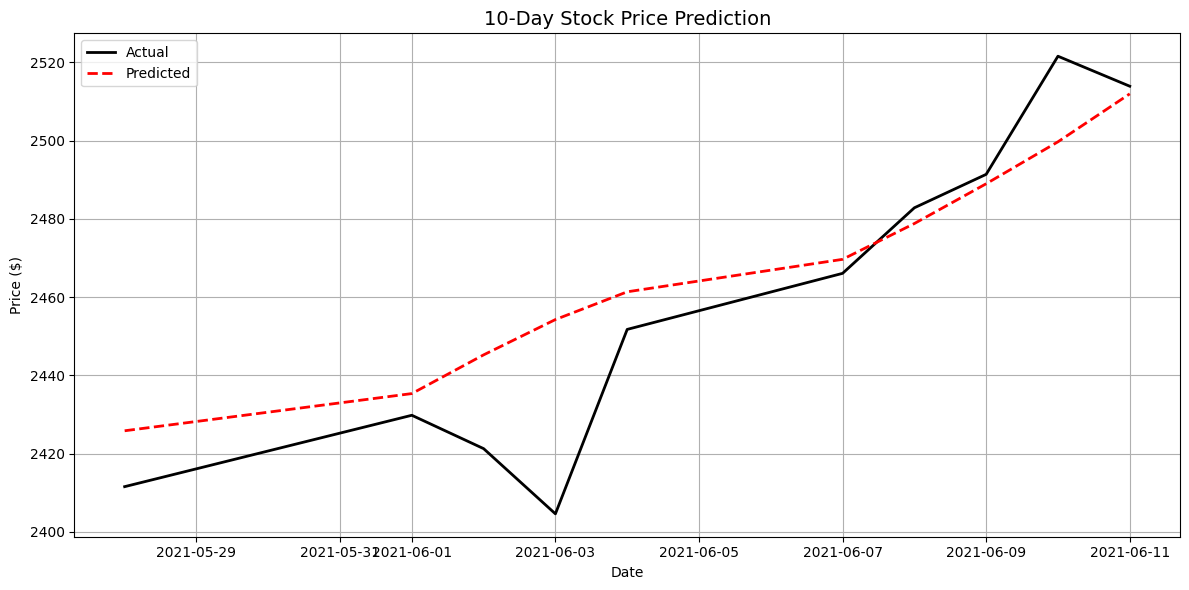

In [ ]:
comparison_df = pd.DataFrame({
    'Date': df.index[-10:],
    'Actual': actual.flatten(),
    'Predicted': predictions.flatten()
})

print("Last 10-Day Predictions vs Actual:")
print(comparison_df.to_string(index=False))

# Plot
plt.figure(figsize=(12,6))
plt.plot(comparison_df['Date'], comparison_df['Actual'], 'k-', label='Actual', linewidth=2)
plt.plot(comparison_df['Date'], comparison_df['Predicted'], 'r--', label='Predicted', linewidth=2)
plt.title('10-Day Stock Price Prediction', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conlusion 

For Google stock price prediction, the LSTM model significantly outperformed the RNN model. LSTM achieved lower errors with MSE: 4309.49, RMSE: 65.64, MAE: 53.33, and a higher R² score of 0.9572, indicating excellent predictive accuracy. In contrast, RNN had much higher error rates and a lower R² of 0.7577, showing it was less effective for this time series task.